In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

In [2]:
sub =  pd.read_csv('./spectrum/TEO/sodalime.csv')
soda_n = sub['n'].values
soda_k = sub['k'].values

SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values

NB_1 = pd.read_csv('./spectrum/TEO/NB_1.csv')
NB1n = NB_1['n'].values
NB1k = NB_1['k'].values

ITO = pd.read_csv('./spectrum/TEO/ITO.csv')
ITOn = ITO['n2'].values
ITOk = ITO['k2'].values
w = ITO['nm'].values

SiO2_TEO = ml.Material(w, SiO21n, SiO21k, w)
NB_TEO = ml.Material(w, NB1n, NB1k, w)
ITO_TEO = ml.Material(w, ITOn, ITOk, w)
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
air = ml.Non_Dispersion(1)
OC = ml.open_material('OC_Nanya', 'Material')
#sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
sodalime_Nanya_TEO = ml.Material(w, soda_n, soda_k, w)
wl = np.linspace(400,700,301)

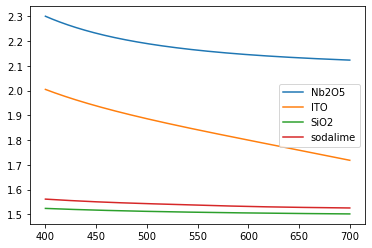

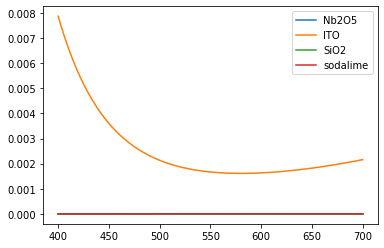

In [9]:
plt.plot(wl, NB_TEO.nvalues(wl), label = 'Nb2O5')
plt.plot(wl, ITO_TEO.nvalues(wl), label = 'ITO')
plt.plot(wl, SiO2_TEO.nvalues(wl), label = 'SiO2')
plt.plot(wl, sodalime_Nanya_TEO.nvalues(wl), label = 'sodalime')
plt.legend(loc = 'best')
plt.savefig('TEO_n.png')
plt.show()
plt.plot(wl, NB_TEO.kvalues(wl), label = 'Nb2O5')
plt.plot(wl, ITO_TEO.kvalues(wl), label = 'ITO')
plt.plot(wl, SiO2_TEO.kvalues(wl), label = 'SiO2')
plt.plot(wl, sodalime_Nanya_TEO.kvalues(wl), label = 'sodalime')
plt.legend(loc = 'best')
plt.savefig('TEO_k.png')
plt.show()

In [ ]:
tk = [90.99943234,21.1894083,52.67896928,4.3345816]
hypo_bri = lambda th: tm.Design(
    [air, SiO2_TEO, ITO_TEO, OC, ITO1, SiO2_TEO, NB_TEO, sodalime_Nanya_TEO],
    [None, th[0], th[1], 1400, 70, th[2], th[3], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air, SiO2_TEO, ITO_TEO, SiO2_TEO, NB_TEO, sodalime_Nanya_TEO],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, SiO2_TEO, SiO2_TEO, NB_TEO, sodalime_Nanya_TEO],
    [None, th[0],th[2], th[3], None]
).reflectance(wl)

In [ ]:
plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_Bonsai_sim_TEO.png')
plt.show()
print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))